In [1]:
#import needed modules
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import matplotlib.pylab as pylab

In [2]:
#Livin' in csv city
mjgross = pd.read_csv('D:/Flatiron/Project/Zips/bom.movie_gross.csv/bom.movie_gross.csv')
imdbname = pd.read_csv('D:/Flatiron/Project/Zips/imdb.name.basics.csv/name.basics.csv')
imdbtitle = pd.read_csv('D:/Flatiron/Project/Zips/imdb.title.akas.csv/title.akas.csv')
imdbtitle2 = pd.read_csv('D:/Flatiron/Project/Zips/imdb.title.basics.csv/title.basics.csv')
imdbcrew = pd.read_csv('D:/Flatiron/Project/Zips/imdb.title.crew.csv/title.crew.csv')
imdbprinc = pd.read_csv('D:/Flatiron/Project/Zips/imdb.title.principals.csv/title.principals.csv')
imdbrate = pd.read_csv('D:/Flatiron/Project/Zips/imdb.title.ratings.csv/title.ratings.csv')
rtinfo = pd.read_csv('D:/Flatiron/Project/Zips/rt.movie_info.tsv/rt.movie_info.tsv', delimiter='\t')
rtreviews = pd.read_csv('D:/Flatiron/Project/Zips/rt.reviews.tsv/rt.reviews.tsv', sep=None)
tmdbmovies = pd.read_csv('D:/Flatiron/Project/Zips/tmdb.movies.csv/tmdb.movies.csv')
tnbudgets = pd.read_csv('D:/Flatiron/Project/Zips/tn.movie_budgets.csv/tn.movie_budgets.csv')

In [3]:
#Make new dict of genres, cutting out fluff
genre_dict = [{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]
k = []
v = []
for i in range(len(genre_dict)):
    k.append(genre_dict[i]['id'])
    v.append(genre_dict[i]['name'])
gendic = dict(zip(k,v))
print(gendic)

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [4]:
#Make lists out of Series
titles = tmdbmovies['title'].to_list()
gennums = tmdbmovies['genre_ids'].to_list()

In [5]:
#Create empty DataFrame
genresnp = np.zeros(shape=(26517, 19))
genre = pd.DataFrame(genresnp, columns = v)
genre = genre.applymap(lambda x: int(x))
genre['titles'] = titles
genre = genre.set_index('titles')

In [6]:
#Make list of lists of ints out of list of strings of lists of ints. It was as hard as it is confusing.
gennums = [i.strip("[]").split(", ") for i in gennums] 
gennums = [[int(j) for j in i if j] for i in gennums]

In [7]:
#Use list of int genres as keys to produce names of genres in genre dictionary.
gennums = [[gendic[j] for j in i if j] for i in gennums]
gennums
n= -1
for i in gennums:
    n += 1
    for j in i:
        if j:
            genre.iloc[n].loc[j] += 1
genre
genres = genre.columns

In [8]:
genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
titles,,,,,,,,,,,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
How to Train Your Dragon,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
Iron Man 2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Toy Story,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Inception,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laboratory Conditions,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
_EXHIBIT_84xxx_,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
The Last One,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [9]:
returnbudgets = tnbudgets
returnbudgets['production_budget'] = returnbudgets['production_budget'].str.replace(',','')
returnbudgets['production_budget'] = returnbudgets['production_budget'].fillna(10)
returnbudgets['production_budget'] = returnbudgets['production_budget'].apply(lambda x: int(str(x)[1:]))
returnbudgets['domestic_gross'] = returnbudgets['domestic_gross'].str.replace(',','')
returnbudgets['domestic_gross'] = returnbudgets['domestic_gross'].fillna(10)
returnbudgets['domestic_gross'] = returnbudgets['domestic_gross'].apply(lambda x: int(str(x)[1:]))
returnbudgets['return'] = returnbudgets['domestic_gross'] / returnbudgets['production_budget'] 

returnbudgets['release_date'] = pd.to_datetime(returnbudgets['release_date'])
since2000 = returnbudgets[returnbudgets['release_date'] > '2000']
since2000 = since2000.sort_values('return', ascending=False)
since2000 = since2000[since2000['return'] > 1]
since2000.set_index('movie')

,id,release_date,production_budget,domestic_gross,worldwide_gross,return
movie,,,,,,
Paranormal Activity,93,2009-09-25,450000,107918810,"$194,183,034",239.819578
The Gallows,80,2015-07-10,100000,22764410,"$41,656,474",227.644100
Super Size Me,10,2004-05-07,65000,11529368,"$22,233,808",177.374892
My Date With Drew,82,2005-08-05,1100,181041,"$181,041",164.582727
Napoleon Dynamite,8,2004-06-11,400000,44540956,"$46,122,713",111.352390
...,...,...,...,...,...,...
Zookeeper,71,2011-07-08,80000000,80360866,"$170,805,525",1.004511
Sex and the City 2,16,2010-05-27,95000000,95347692,"$294,680,778",1.003660
The Book of Life,35,2014-10-17,50000000,50151543,"$97,651,543",1.003031


In [21]:
# movies = list(since2000['movie'])
# genre = genre[~genre.index.duplicated()]
# genre = genre[genre.notnull()]
# genre.reindex(list(returnbudgets['movie']))
# genre.reset_index()
# genre = genre.merge(returnbudgets, left_on='titles', right_on='movie', how='inner')
# genre.set_index('movie')
genre.shape

(1977, 26)

In [11]:
genrevalue = {}
for row in genre.index:
    genrecount = 0
    for g in genres:
        if genre.loc[row, g]:
            if g not in genrevalue:
                genrevalue[g] = genre.loc[row, 'return']
                genrecount += 1
            else:
                genrevalue[g] += genre.loc[row, 'return']
                genrecount += 1
        try:
            genrevalue[g] = int(genrevalue[g]) / genrecount
        except:
            continue

In [12]:
sortgenre = {k: v for k, v in sorted(genrevalue.items(), key=lambda item: item[1])}
sortgenre

{'Family': 0.0,
 'Fantasy': 0.0,
 'Science Fiction': 0.0,
 'Comedy': 0.0,
 'Thriller': 0.0,
 'Drama': 0.0,
 'Romance': 0.0,
 'Mystery': 0.0,
 'Crime': 0.0,
 'History': 0.0,
 'Western': 0.0,
 'War': 0.0,
 'Documentary': 0.0,
 'Music': 0.0,
 'TV Movie': 0.0,
 'Horror': 1.0,
 'Adventure': 2.0,
 'Animation': 22.0,
 'Action': 378.0}

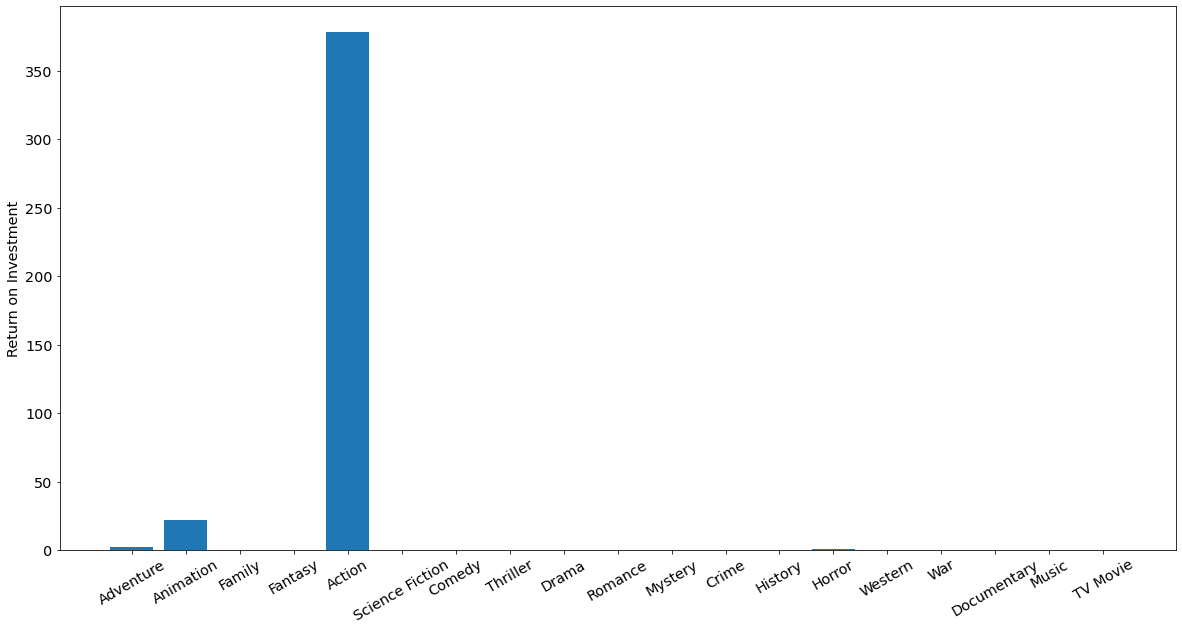

In [13]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.xticks(rotation=30)
plt.ylabel('Return on Investment')
plt.bar(genrevalue.keys(), genrevalue.values());

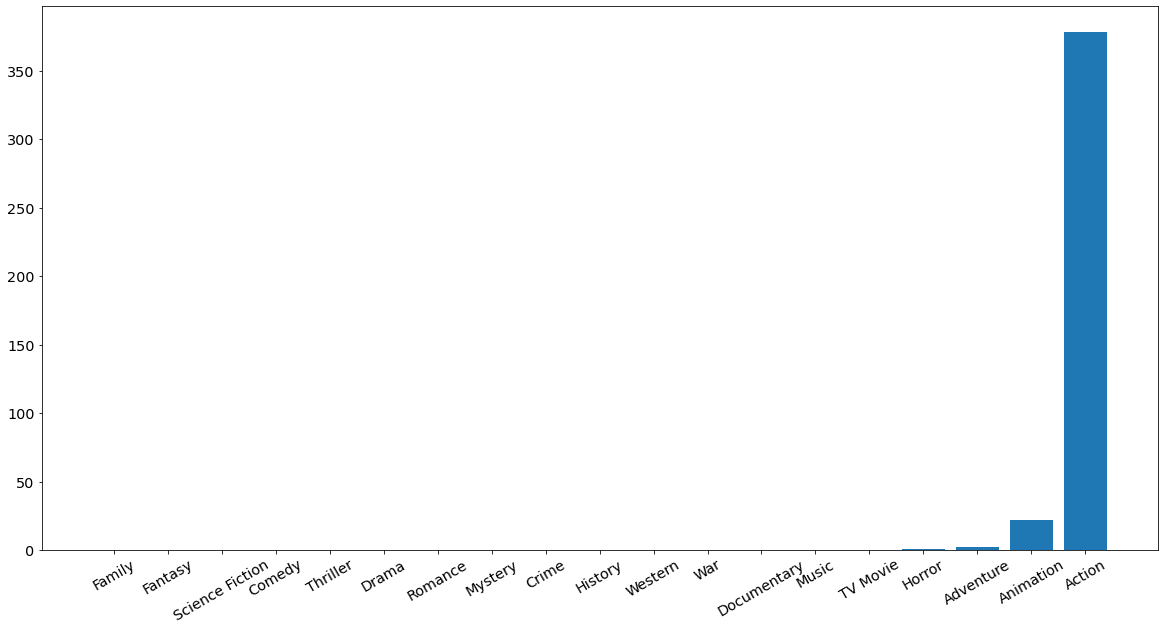

In [14]:
sortgenrenoaction = sortgenre
# del sortgenrenoaction['Action']
plt.xticks(rotation=30)
noaction = plt.bar(sortgenrenoaction.keys(), sortgenrenoaction.values())

In [15]:
# top2 = [28, 16]
# tmdbmovies['hasTop3Genres'] = [True if all(elem in ast.literal_eval(g) for elem in top2) else False for g in tmdbmovies['genre_ids']]
# tmcartoon = tmdbmovies[tmdbmovies['hasTop3Genres']==True]
# tmcartoon

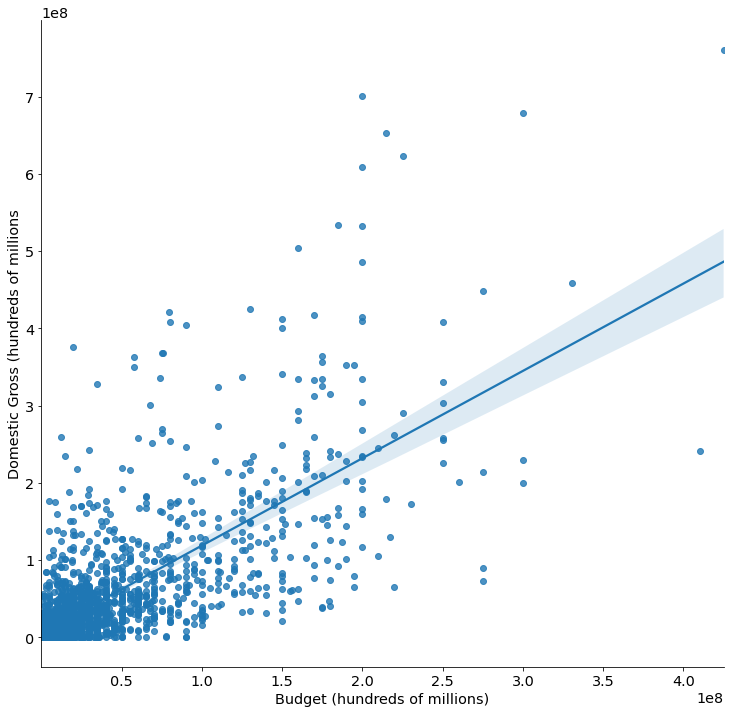

In [16]:
ax = sns.lmplot(data=genre, x='production_budget', y='domestic_gross', size=10)
ax.set(xlabel='Budget (hundreds of millions)', ylabel= 'Domestic Gross (hundreds of millions');

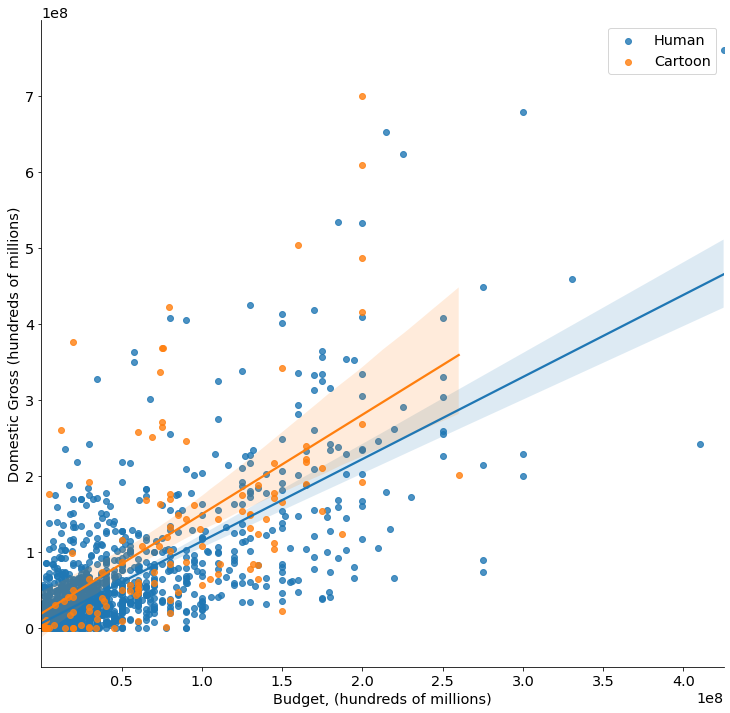

In [17]:
ax = sns.lmplot(data=genre, x='production_budget', y='domestic_gross', hue = 'Animation', legend_out=False, size=10)
new_labels = ['Human', 'Cartoon']
ax._legend.set_title(None)
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)
ax.set(xlabel='Budget, (hundreds of millions)', ylabel= 'Domestic Gross (hundreds of millions)');

In [18]:
since2000

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return
5492,93,2009-09-25,Paranormal Activity,450000,107918810,"$194,183,034",239.819578
5679,80,2015-07-10,The Gallows,100000,22764410,"$41,656,474",227.644100
5709,10,2004-05-07,Super Size Me,65000,11529368,"$22,233,808",177.374892
5781,82,2005-08-05,My Date With Drew,1100,181041,"$181,041",164.582727
5507,8,2004-06-11,Napoleon Dynamite,400000,44540956,"$46,122,713",111.352390
...,...,...,...,...,...,...,...
570,71,2011-07-08,Zookeeper,80000000,80360866,"$170,805,525",1.004511
415,16,2010-05-27,Sex and the City 2,95000000,95347692,"$294,680,778",1.003660
1134,35,2014-10-17,The Book of Life,50000000,50151543,"$97,651,543",1.003031
4336,37,2009-06-12,Moon,5000000,5010163,"$10,676,073",1.002033
